In [38]:
import pandas as pd
import random
import numpy as np


In [39]:
#instalar paquete requests, beautifulsoup4 para hacer web scraping
!pip install requests beautifulsoup4

In [40]:
import requests
from bs4 import BeautifulSoup

In [41]:

seed = 20250827

random.seed(seed)

np.random.seed(seed)

print("Seed fixed as:", seed)


Seed fixed as: 20250827


In [42]:
#queremos obtener algo del url
url = "https://www.eluniversal.com.mx"
rest = requests.get(url)
respuesta =requests.get(url)

In [43]:
print(f"respuesta del get:{respuesta.status_code}")

respuesta del get:200


In [44]:
#post requerimiento para hacer cambios en la pagina web:403 no acceso
data = {'gobierno':'malo'}
respuesta= requests.post(url,data = data)
print(f"respuesta de post:{respuesta.status_code}")


respuesta de post:403


In [45]:
respuesta = requests.put(url,data=data)
print(f"respuesta de put:{respuesta.status_code}")

respuesta de put:501


In [46]:
#requerimiento para borrar la url
respuesta = requests.delete(url)
print(f"respuesta de delate:{respuesta.status_code}")

respuesta de delate:501


In [47]:
#listado
respuesta = requests.options(url)
print(f"respuesta de options:{respuesta.status_code}")

respuesta de options:200


In [48]:
#realice un análisis de estructura del html del url
soup=BeautifulSoup(rest.text,"html.parser")
encabezado= soup.find_all('h2')
h2=[]
for i in encabezado[ :]:
  titulo = i.text.strip()
  if titulo:
    h2.append(titulo)

In [49]:
t = soup.find("html")
print(t)

<html lang="es"><head><link as="script" href="https://securepubads.g.doubleclick.net/tag/js/gpt.js" rel="preload"/><script async="" src="https://securepubads.g.doubleclick.net/tag/js/gpt.js"></script><title>El Universal | El periódico de México líder en noticias y clasificados</title><link href="/pf/resources/website/eluniversal/favicon.ico?d=1518" rel="shortcut icon" type="image/vnd.microsoft.icon"/><meta charset="utf-8"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="width=device-width, initial-scale=1" name="viewport"/><meta content="es" name="lang"/><meta content="El Universal" name="abstract"/><meta content="follow, index, max-image-preview:large, max-snippet:-1" name="robots"/><meta content="on" http-equiv="x-dns-prefetch-contro"/><meta content="Noticias de última hora de México y el mundo. Noticias minuto a minuto de política, ovidio, culiacan, AMLO, AIFA, Ucrania, Rusia, deportes, espectáculos," name="description"/><meta content="rosalía,noticias, el unive

In [50]:
df=pd.DataFrame({"titular":h2})
df

,titular
0,Servicios
1,Principales
2,"Con el himno de fondo, Alito Moreno y Noroña s..."
3,Noroña denunciará penalmente a Alito Moreno po...
4,Estos son los videos de la pelea entre Alito M...
...,...
71,"La leyenda de la cascada de Basaseachi, la más..."
72,Conoce el nuevo Volkswagen T-Roc
73,Qué tipo de carne es la cecina
74,Tendencias🫢


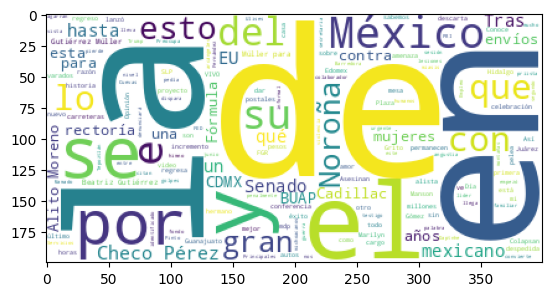

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

unido = ' '.join(h2)

diagrama = WordCloud(background_color= "white").generate(unido)
plt.imshow(diagrama)
plt.show()


In [52]:
eliminar = {"lo", "en","de","la","y","por","con", "se", "su","que","el","para","una","contra","sin","un","del","qué","del","los","las","e","sobre","al","e","es","tras"}

def limpiar_prep(texto):
  palabra = texto.lower().split()
  filtrado = [i for i in palabra if i not in eliminar]
  return  ' '.join(filtrado)

In [53]:
df["titular_limpio"] = df['titular'].apply(limpiar_prep)

In [54]:
t = ' '.join(df["titular_limpio"])


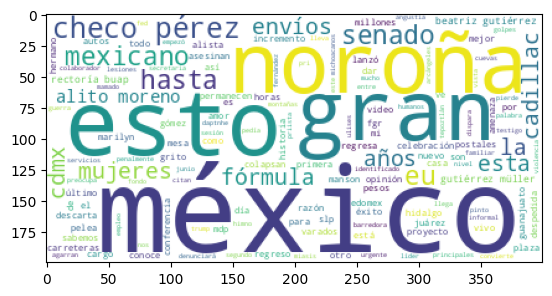

In [55]:
diagrama = WordCloud(background_color= "white").generate(t)
plt.imshow(diagrama)
plt.show()

In [56]:
peso = diagrama.words_
for p,b in peso.items():
  print(f"palabra {p}: peso {b}" )

palabra méxico: peso 1.0
palabra esto: peso 0.5454545454545454
palabra noroña: peso 0.45454545454545453
palabra gran: peso 0.45454545454545453
palabra checo pérez: peso 0.45454545454545453
palabra senado: peso 0.36363636363636365
palabra hasta: peso 0.36363636363636365
palabra eu: peso 0.36363636363636365
palabra mexicano: peso 0.36363636363636365
palabra la: peso 0.2727272727272727
palabra mujeres: peso 0.2727272727272727
palabra cdmx: peso 0.2727272727272727
palabra años: peso 0.2727272727272727
palabra esta: peso 0.2727272727272727
palabra envíos: peso 0.2727272727272727
palabra cadillac: peso 0.2727272727272727
palabra fórmula: peso 0.2727272727272727
palabra alito moreno: peso 0.2727272727272727
palabra beatriz gutiérrez: peso 0.2727272727272727
palabra gutiérrez müller: peso 0.2727272727272727
palabra rectoría buap: peso 0.2727272727272727
palabra video: peso 0.18181818181818182
palabra son: peso 0.18181818181818182
palabra pelea: peso 0.18181818181818182
palabra el: peso 0.18181

In [57]:
print("Número de titulares extraídos:", len(h2))
print("Top 10 palabras:", list(peso.items())[:10])


Número de titulares extraídos: 76
Top 10 palabras: [('méxico', 1.0), ('esto', 0.5454545454545454), ('noroña', 0.45454545454545453), ('gran', 0.45454545454545453), ('checo pérez', 0.45454545454545453), ('senado', 0.36363636363636365), ('hasta', 0.36363636363636365), ('eu', 0.36363636363636365), ('mexicano', 0.36363636363636365), ('la', 0.2727272727272727)]
